# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Load data

In [2]:
# Load the data file into a DataFrame
vehicles = pd.read_csv('/datasets/vehicles_us.csv')



### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

print(vehicles.head(15))

    price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
1   25500         NaN                ford f-150       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent      

In [5]:
vehicles.isna().sum().to_frame()

,0
price,0
model_year,3619
model,0
condition,0
cylinders,5260
fuel,0
odometer,7892
transmission,0
type,0
paint_color,9267


In [6]:
vehicles.isnull().sum() * 100 / len(vehicles) 

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [7]:
vehicles.duplicated().sum()

0

### Conclusions and further steps

The data provided consists of 13 columns and 51525 rows. There is a substancial amount of data missing in the following columns: model year - 3619, cylinders - 5260, odometer- 7892,
paint color-9267, and is_4wd- 25953. Percentage of missing data is about 7%-18% with the highest being 50% missing data in the is_4wd column.                                 
No duplicates were found in this data.



## Treat missing values (if any)

'is_4wd' is filled with the number 1 and NaN values. I'd assume that the 1 is representive of cars that are 4wd and all NaN values will be filled with a 0 for cars that are not 4wd. 'paint_color' column do not correlate with any other data and will be filled with 'unknown'. The price of a car is dependent on it's miles and it's condition. It only makes sense to fill in the missing values of 'odometer' column with the median of both 'model_year' and 'condition' columns. The same will be done to fill missing values in model_year but we will be using odometer and condition columns and cylinders will be filled grouping model and model_year.

In [8]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

In [9]:
vehicles['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [10]:
vehicles['paint_color'] = vehicles['paint_color'].fillna('unknown')

In [11]:
vehicles['paint_color'].unique()

array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [12]:
vehicles['model_year'] =vehicles['model_year'].fillna(vehicles.groupby(['condition','model'])['model_year'].transform('median'))
vehicles['odometer'] =vehicles['odometer'].fillna(vehicles.groupby(['condition','model_year'])['odometer'].transform('median'))
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.groupby(['model', 'model_year'])['cylinders'].transform('median'))

In [13]:
vehicles.isnull().sum() * 100 / len(vehicles) 

price           0.000000
model_year      0.011645
model           0.000000
condition       0.000000
cylinders       0.058224
fuel            0.000000
odometer        0.015526
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

The data is now missing less than 1% and can now be dropped as it would not affect our data.

In [14]:
vehicles.dropna(subset = ['model_year', 'cylinders', 'odometer'],inplace=True)

In [15]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51483 non-null  int64  
 1   model_year    51483 non-null  float64
 2   model         51483 non-null  object 
 3   condition     51483 non-null  object 
 4   cylinders     51483 non-null  float64
 5   fuel          51483 non-null  object 
 6   odometer      51483 non-null  float64
 7   transmission  51483 non-null  object 
 8   type          51483 non-null  object 
 9   paint_color   51483 non-null  object 
 10  is_4wd        51483 non-null  float64
 11  date_posted   51483 non-null  object 
 12  days_listed   51483 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


## Fix data types

'date_posted' dtype will be changed from object to datetime as the values are representative of a period in time. Since there arent any numbers after the decimal in 'model_year', 'odometer', and 'cylinders' they can be converted from float to an integer. Lastly, 'is_4wd' will be changed to bool as the values in that column are representive of True and False.

In [16]:
vehicles['date_posted']=pd.to_datetime(vehicles['date_posted'], format= '%Y-%m-%d')
vehicles['model_year']= vehicles['model_year'].astype('int64')
vehicles['is_4wd']= vehicles['is_4wd'].astype('bool')
vehicles['odometer']= vehicles['odometer'].astype('int64')
vehicles['cylinders']= vehicles['cylinders'].astype('int64')

In [17]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51483 non-null  int64         
 1   model_year    51483 non-null  int64         
 2   model         51483 non-null  object        
 3   condition     51483 non-null  object        
 4   cylinders     51483 non-null  int64         
 5   fuel          51483 non-null  object        
 6   odometer      51483 non-null  int64         
 7   transmission  51483 non-null  object        
 8   type          51483 non-null  object        
 9   paint_color   51483 non-null  object        
 10  is_4wd        51483 non-null  bool          
 11  date_posted   51483 non-null  datetime64[ns]
 12  days_listed   51483 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 5.2+ MB


Our new data now consists of 13 columns and 51483 rows.

## Enrich data

In order to calculate the age of a car, a new column [year_of_post] was created. New column was then converted to Int64 in order to make that calculation work.

In [18]:
vehicles['year_of_post'] = vehicles['date_posted']


In [19]:
vehicles['year_of_post']= pd.DatetimeIndex(vehicles['year_of_post']).year

In [20]:
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_of_post
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019
3,1500,2003,ford f-150,fair,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019


# Add datetime values for when the ad was placed



In [21]:
# Add the vehicle's age when the ad was placed
vehicles['vehicle_age'] = vehicles['year_of_post'] - vehicles['model_year'] + 1

In [22]:
# Add the vehicle's average mileage per year
vehicles['avg_mileage'] = vehicles['odometer'] / vehicles['model_year']

In [23]:
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_of_post,vehicle_age,avg_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018,8,72.103431
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,11,44.175797
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,7,54.644809
3,1500,2003,ford f-150,fair,8,gas,188000,automatic,pickup,unknown,False,2019-03-22,9,2019,17,93.859211
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,3,40.110560
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,5,28.775571
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,4,39.311166
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019,7,54.383010
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018,7,51.776342
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019,12,73.302291


In [24]:
# It might help to replace the condition values with something that can be manipulated more easily
vehicles['condition'].replace(['new','like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0], inplace=True)

## Check clean data

Our new data now consists of 16 columns and 51483 rows.

In [25]:
# print the general/summary information about the DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51483 non-null  int64         
 1   model_year    51483 non-null  int64         
 2   model         51483 non-null  object        
 3   condition     51483 non-null  int64         
 4   cylinders     51483 non-null  int64         
 5   fuel          51483 non-null  object        
 6   odometer      51483 non-null  int64         
 7   transmission  51483 non-null  object        
 8   type          51483 non-null  object        
 9   paint_color   51483 non-null  object        
 10  is_4wd        51483 non-null  bool          
 11  date_posted   51483 non-null  datetime64[ns]
 12  days_listed   51483 non-null  int64         
 13  year_of_post  51483 non-null  int64         
 14  vehicle_age   51483 non-null  int64         
 15  avg_mileage   51483 non-null  float6

In [26]:
vehicles.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_of_post,vehicle_age,avg_mileage
count,51483.000000,51483.000000,51483.000000,51483.000000,51483.000000,51483.000000,51483.000000,51483.000000,51483.000000
mean,12132.410135,2009.802945,2.637609,6.120078,115208.074374,39.552648,2018.307422,9.504477,57.370198
std,10032.673912,6.065026,0.711500,1.657329,62204.281429,28.201740,0.461430,6.078763,31.054033
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,73039.500000,19.000000,2018.000000,5.000000,36.359434
50%,9000.000000,2011.000000,3.000000,6.000000,114605.000000,33.000000,2018.000000,8.000000,57.007466
75%,16850.500000,2014.000000,3.000000,8.000000,152381.000000,53.000000,2019.000000,13.000000,75.924763
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,111.000000,504.073320


In [27]:
# print a sample of data
print(vehicles.head(15))

    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5          2          6  gas   
1   25500        2008                ford f-150          2          6  gas   
2    5500        2013            hyundai sonata          4          4  gas   
3    1500        2003                ford f-150          1          8  gas   
4   14900        2017              chrysler 200          3          4  gas   
5   14990        2014              chrysler 300          3          6  gas   
6   12990        2015              toyota camry          3          4  gas   
7   15990        2013               honda pilot          3          6  gas   
8   11500        2012               kia sorento          3          4  gas   
9    9200        2008               honda pilot          3          6  gas   
10  19500        2011  chevrolet silverado 1500          3          8  gas   
11   8990        2012              honda accord          3      

## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

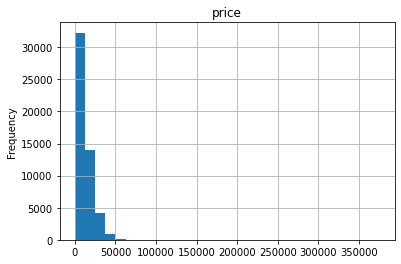

In [28]:
#
vehicles['price'].plot(y='price', kind='hist', bins=30, title='price', grid=True)
plt.show()

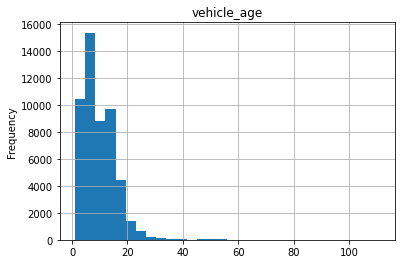

In [29]:
#
vehicles['vehicle_age'].plot(y='vehicle_age', kind='hist', bins=30, title='vehicle_age', grid=True)
plt.show()


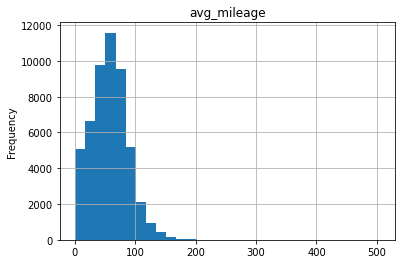

In [30]:
#
vehicles['avg_mileage'].plot(y='avg_mileage', kind='hist', bins=30, title='avg_mileage', grid=True)
plt.show()


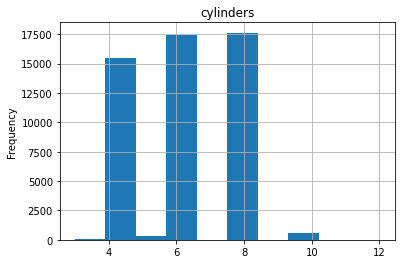

In [31]:
#

vehicles['cylinders'].plot(y='cylinders', kind='hist', bins=10, title='cylinders', grid=True)
plt.show()


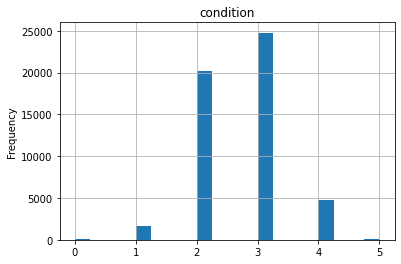

In [32]:
#

vehicles['condition'].plot(y='condition', kind='hist', bins=20, title='condition', grid=True)
plt.show()

In [33]:
#
vehicles.describe()[['price', 'vehicle_age', 'avg_mileage', 'cylinders', 'condition']]


,price,vehicle_age,avg_mileage,cylinders,condition
count,51483.000000,51483.000000,51483.000000,51483.000000,51483.000000
mean,12132.410135,9.504477,57.370198,6.120078,2.637609
std,10032.673912,6.078763,31.054033,1.657329,0.711500
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,5.000000,36.359434,4.000000,2.000000
50%,9000.000000,8.000000,57.007466,6.000000,3.000000
75%,16850.500000,13.000000,75.924763,8.000000,3.000000
max,375000.000000,111.000000,504.073320,12.000000,5.000000


## Study and treat outliers

'price', 'vehicle_age', and 'avg_mileage' seem to be the only columns with outliers. The lower outliers for 'price column is -12,775.75 and the highest being 34,626.25. Outliers for the age of a vehicles is -8 and upper limit is 24. For the average mileage column the lower limit is -22.99 and upper limit is 135.27. 

In [34]:
columns = ['price', 'vehicle_age', 'avg_mileage']
Q1 = vehicles[columns].quantile(0.25)
Q3 = vehicles[columns].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price          11850.500000
vehicle_age        8.000000
avg_mileage       39.565329
dtype: float64


In [35]:
# Determine the lower limits for outliers
lower= Q1 - 1.5 * IQR
print(lower)

price         -12775.75000
vehicle_age       -7.00000
avg_mileage      -22.98856
dtype: float64


In [36]:
# Determine the upper limits for outliers
upper = Q3 + 1.5 * IQR
print(upper)


price          34626.250000
vehicle_age       25.000000
avg_mileage      135.272757
dtype: float64


In [37]:
# Store data without outliers in a separate DataFrame

vehicles_cleaned = vehicles[~((vehicles[columns] < lower) |(vehicles[columns] > upper)).any(axis=1)]

In [38]:
vehicles_cleaned.shape

(48529, 16)

In [39]:
vehicles_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48529 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         48529 non-null  int64         
 1   model_year    48529 non-null  int64         
 2   model         48529 non-null  object        
 3   condition     48529 non-null  int64         
 4   cylinders     48529 non-null  int64         
 5   fuel          48529 non-null  object        
 6   odometer      48529 non-null  int64         
 7   transmission  48529 non-null  object        
 8   type          48529 non-null  object        
 9   paint_color   48529 non-null  object        
 10  is_4wd        48529 non-null  bool          
 11  date_posted   48529 non-null  datetime64[ns]
 12  days_listed   48529 non-null  int64         
 13  year_of_post  48529 non-null  int64         
 14  vehicle_age   48529 non-null  int64         
 15  avg_mileage   48529 non-null  float6

After dropping the outliers, our data now consists of 48529 rows and 16 columns.

## Study core parameters without outliers

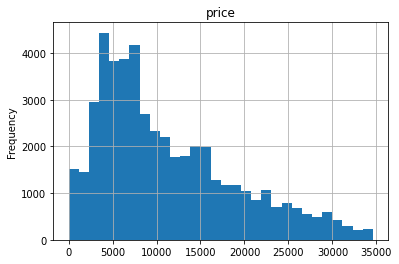

In [40]:
vehicles_cleaned['price'].plot(y='price', kind='hist', bins=30, title='price', grid=True)
plt.show()

'price' histograms shows that most cars are sold for less than $5000 but there are still remaining outliers in the data as shown above.

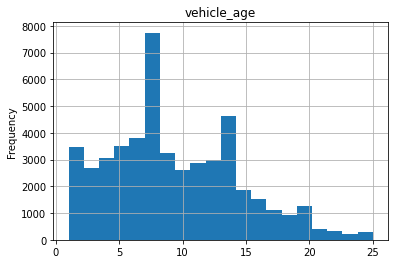

In [41]:
vehicles_cleaned['vehicle_age'].plot(y='price', kind='hist', bins=20, title='vehicle_age',grid=True)
plt.show()

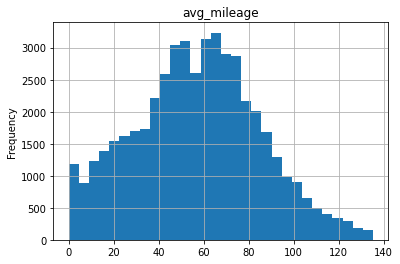

In [42]:
vehicles_cleaned['avg_mileage'].plot(y='avg_mileage', kind='hist', bins=30, title='avg_mileage', grid=True)
plt.show()

## Ads lifetime

In [43]:
vehicles_cleaned.describe()[['days_listed']]

,days_listed
count,48529.00000
mean,39.53976
std,28.21445
min,0.00000
25%,19.00000
50%,33.00000
75%,53.00000
max,271.00000


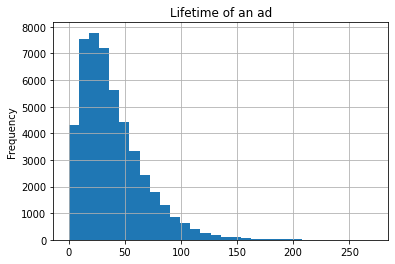

In [44]:
vehicles_cleaned['days_listed'].plot(y='days_listed', kind='hist', bins=30, title='Lifetime of an ad', grid=True)
plt.show()

## Average price per each type of vehicle

In [45]:
ads_listed= vehicles_cleaned.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
ads_listed.columns = ['mean_price', 'total_ad']
ads_listed.sort_values(by='total_ad')

,mean_price,total_ad
type,,
bus,17445.913043,23
offroad,14292.989071,183
other,10482.776371,237
convertible,12853.376068,351
van,8820.914384,584
hatchback,6838.923535,1007
mini-van,8046.564080,1147
wagon,8975.517928,1506
coupe,13476.049285,2029


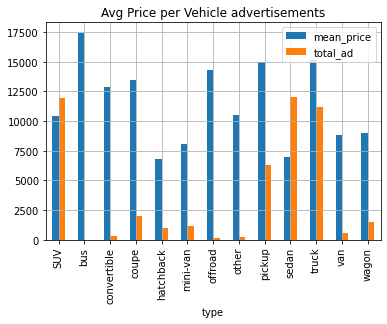

In [46]:
ads_listed.plot(kind='bar', title='Avg Price per Vehicle advertisements', grid=True)
plt.show()

Sedan and SUV have the highest amount of ads placed.

In [47]:
avg_price= vehicles_cleaned.pivot_table(index='type', values='price', aggfunc= 'mean')
avg_price.sort_values(by='price')

,price
type,
hatchback,6838.923535
sedan,6969.687775
mini-van,8046.564080
van,8820.914384
wagon,8975.517928
SUV,10435.610622
other,10482.776371
convertible,12853.376068
coupe,13476.049285


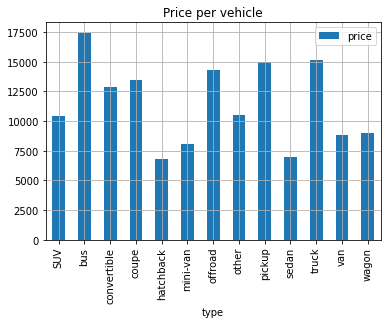

In [48]:
avg_price.plot(kind='bar', title='Price per vehicle', grid=True);

There seems to be no correlation with prices and advertisements.

## Price factors

In [49]:
vehicles_cleaned.query('type == "sedan"')[['price','odometer', 'vehicle_age', 'condition', 'avg_mileage']].corr()

,price,odometer,vehicle_age,condition,avg_mileage
price,1.000000,-0.564217,-0.619790,0.293757,-0.565167
odometer,-0.564217,1.000000,0.626392,-0.343310,0.999990
vehicle_age,-0.619790,0.626392,1.000000,-0.317716,0.629239
condition,0.293757,-0.343310,-0.317716,1.000000,-0.343772
avg_mileage,-0.565167,0.999990,0.629239,-0.343772,1.000000


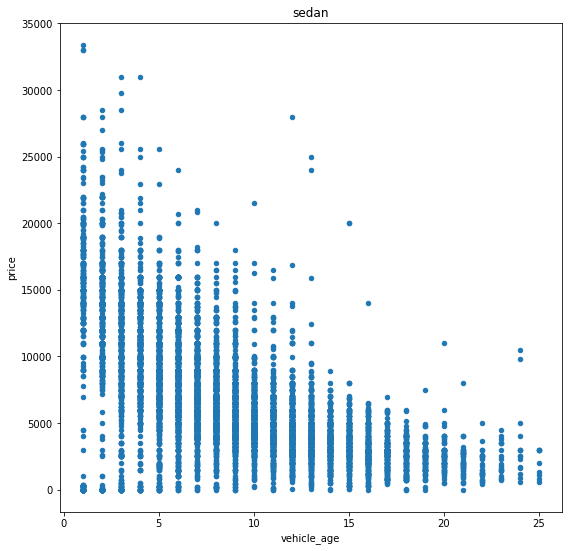

In [50]:
vehicles_cleaned.query('type == "sedan"').plot(x='vehicle_age', y='price', kind='scatter', title='sedan', figsize=(9, 9));

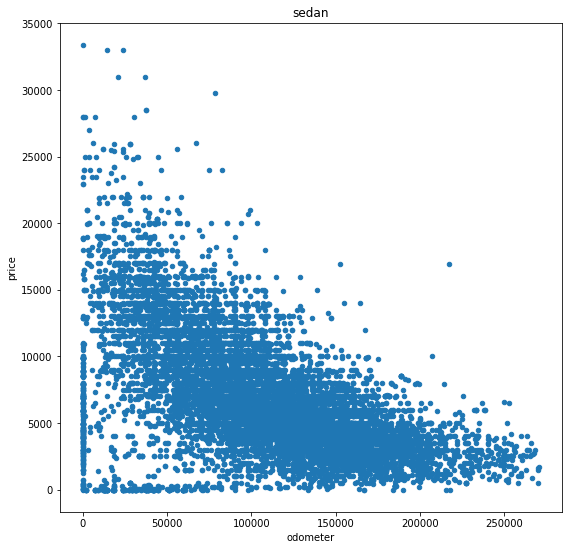

In [62]:
vehicles_cleaned.query('type == "sedan"').plot(x='odometer', y='price', kind='scatter', title='sedan', figsize=(9, 9));

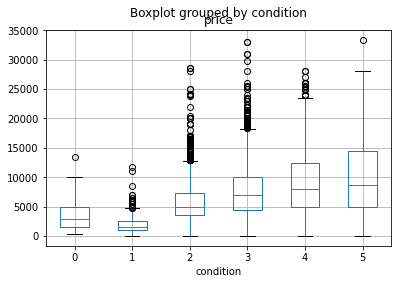

In [52]:
vehicles_cleaned.query('type == "sedan"').boxplot(by='condition', column='price');

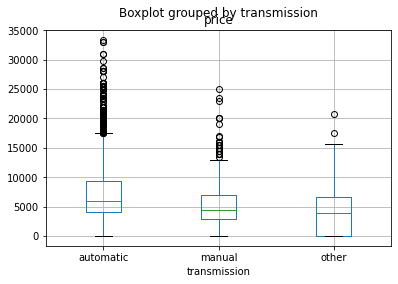

In [67]:
vehicles_cleaned.query('type == "sedan"').boxplot(by='transmission', column='price');

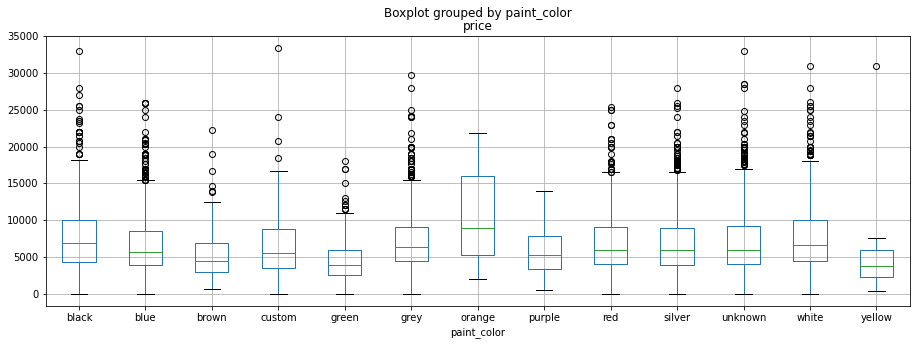

In [71]:
vehicles_cleaned.query('type == "sedan"').boxplot(by='paint_color', column='price', figsize=(15, 5));

In [56]:
vehicles_cleaned.query('type == "SUV"')[['price','odometer', 'vehicle_age', 'condition', 'avg_mileage']].corr()

,price,odometer,vehicle_age,condition,avg_mileage
price,1.000000,-0.523323,-0.578692,0.263609,-0.524458
odometer,-0.523323,1.000000,0.631716,-0.343161,0.999988
vehicle_age,-0.578692,0.631716,1.000000,-0.335155,0.634872
condition,0.263609,-0.343161,-0.335155,1.000000,-0.343871
avg_mileage,-0.524458,0.999988,0.634872,-0.343871,1.000000


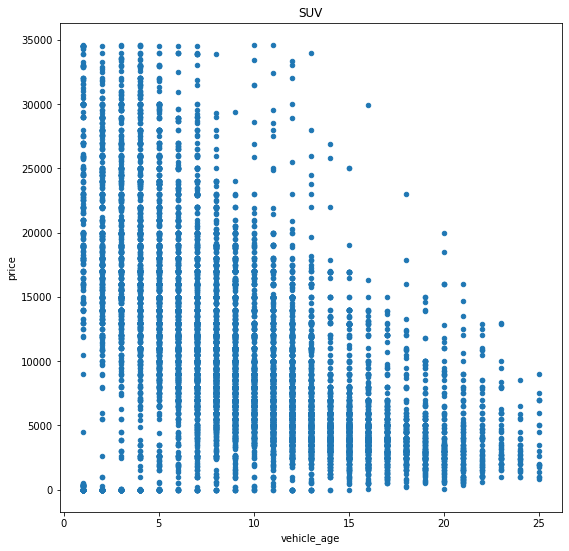

In [57]:
vehicles_cleaned.query('type == "SUV"').plot(x='vehicle_age', y='price', kind='scatter', title='SUV', figsize=(9, 9));

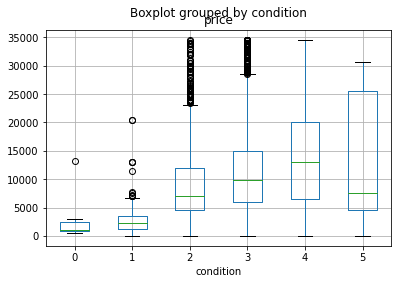

In [72]:
vehicles_cleaned.query('type == "SUV"').boxplot(by='condition', column='price');

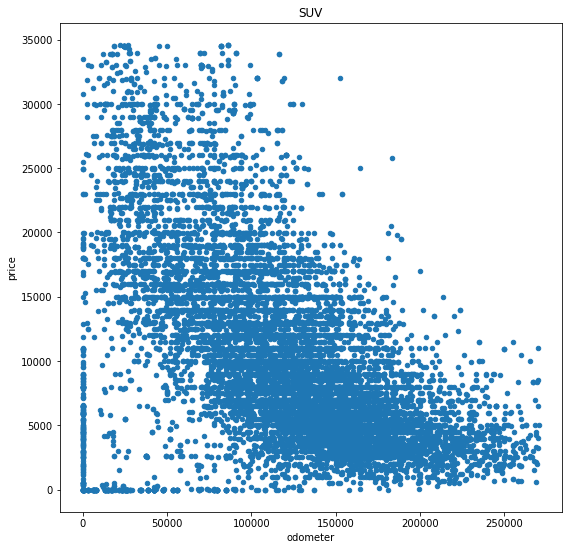

In [59]:
vehicles_cleaned.query('type == "SUV"').plot(x='odometer', y='price', kind='scatter', title='SUV', figsize=(9, 9));

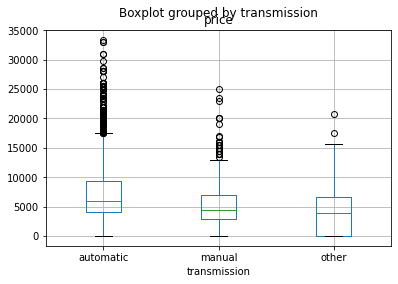

In [73]:
vehicles_cleaned.query('type == "sedan"').boxplot(by='transmission', column='price');

For both Sedan and SUV, transmission type does not affect the vehicles price.

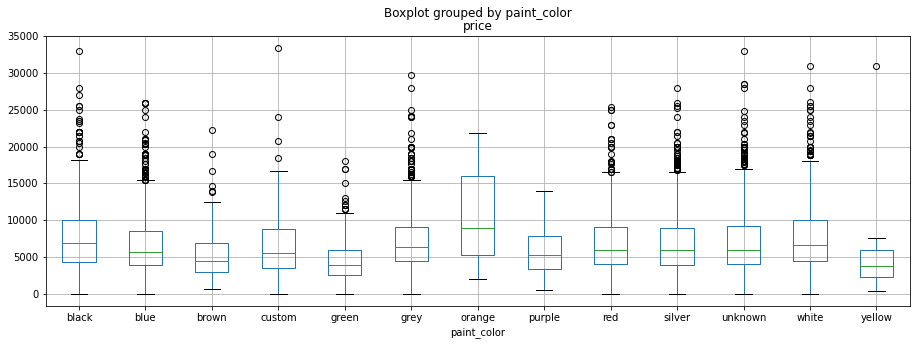

In [74]:
vehicles_cleaned.query('type == "sedan"').boxplot(by='paint_color', column='price', figsize=(15, 5));

It seems price is affected more by the condition of a car than any other factor. When looking at the boxplots for paint_color it seems that price isnt really affected by the color of a vehicle.

I'm not sure I quite understand the instructions above. I have used boxplotsfor paint_color and transmission on the mos popula Sedan and SUV

## General conclusion

Our data first started w/ 51525 rows and 13 columns. After viewing a sample of that data, we found missing values in 5 columns. The highest missing values, making up 50%, were found in the 'is_4wd' column.'is_4wd' was filled with a 0 for cars that did not meet the 4wd criteria. 'paint_color' column did not correlate with any other data and was filled as 'unknown'. The price of a car is dependent on it's miles and it's condition, the missing values of 'odometer' column were filled with the median of both 'model_year' and 'condition' columns. The same was done to fill missing values in model_year but we will be using odometer and condition columns and cylinders will be filled grouping model and model_year.
After filling our data, missing values were still found but they made up less than 1% for each column hence they were dropped without affecting our data.
We then moved to make changes to our data dtype.'date_posted' dtype was changed from object to datetime as the values are representative of a period in time. Since there arent any numbers after the decimal in 'model_year', 'odometer', and 'cylinders' they can be converted from float to an integer. Lastly, 'is_4wd' was changed to bool as the values in that column are representive of True and False.
Enrinching our data consisted of calculating the vehicles age and it's annual mileage. To make such calculations a new column was created , year_of_post, and was derived from date_posted. Our clean data now consisted of 51483 rows and 16 columns.
We then studied the datas parameters and found that price was right skwewed and price started at $1. Most cars were sold wihin the range of 5k-9k and a max of 375,000. There were definitely some outliers here. Most vehicles sold were between 4- 7 years and the oldest car was 110. Avg_mileage fell within 36-57 miles a year. Most cars had cylinders of 4, 5 and 6 and the max being 12. Most conditions of the cars were (2)good and (3) excellent. After removing the outliers in the parameters some were still found but we were able to come to a a conclusion that from all the parameters what really affected the purchase of a car was it's condition.